# Housing Prices in San Antonio - Data Analysis and Prediction

### Objective
This project aims to analyze the key factors affecting house prices in San Antonio and build a predictive model to estimate home values based on various features.

### Dataset
- The dataset was obtained from Zillow, a well-known real estate platform.
- The dataset contains real estate data, including property size, number of bedrooms/bathrooms, location, and more.
- The goal is to identify which variables most influence home prices and create a model to predict property values.

### Key Questions
- What are the main factors that influence housing prices in San Antonio?
- How do different features (e.g., square footage, number of rooms) affect property values?
- Can we build a predictive model to estimate housing prices accurately?

In [6]:
import pandas as pd

In [8]:
# Load the dataset
file_path = "/Users/mariasanchez/Downloads/Zillow Home Prices.csv"  
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,236727.973000,237987.795789,...,739573.844857,744189.402889,747396.771285,748150.519244,749311.764366,752079.850522,755478.650376,758281.989250,761084.407560,763860.601871
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,215333.732978,215659.771692,...,919325.021708,917958.377093,919122.385894,919290.645181,921960.254493,927428.930198,935050.376032,940880.452135,945271.883568,948383.493420
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,100699.659832,100674.074696,...,265731.970990,266779.386706,267419.332256,267350.000037,266970.192347,266525.442534,266132.642458,265578.379484,265054.070126,264852.284681
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,141848.366420,141886.264032,...,289835.363831,291884.815545,293129.699904,293628.229677,293813.428872,294413.961749,294875.987415,295069.172683,295169.219334,295742.623487
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,97384.716064,97475.126578,...,255784.393742,256108.922407,256087.048813,255707.268163,254825.878923,254021.369882,253205.382440,252448.525412,251637.673617,251098.145941


In [5]:
# Filter for a specific city
city_data = df[df["RegionName"] == "San Antonio"]


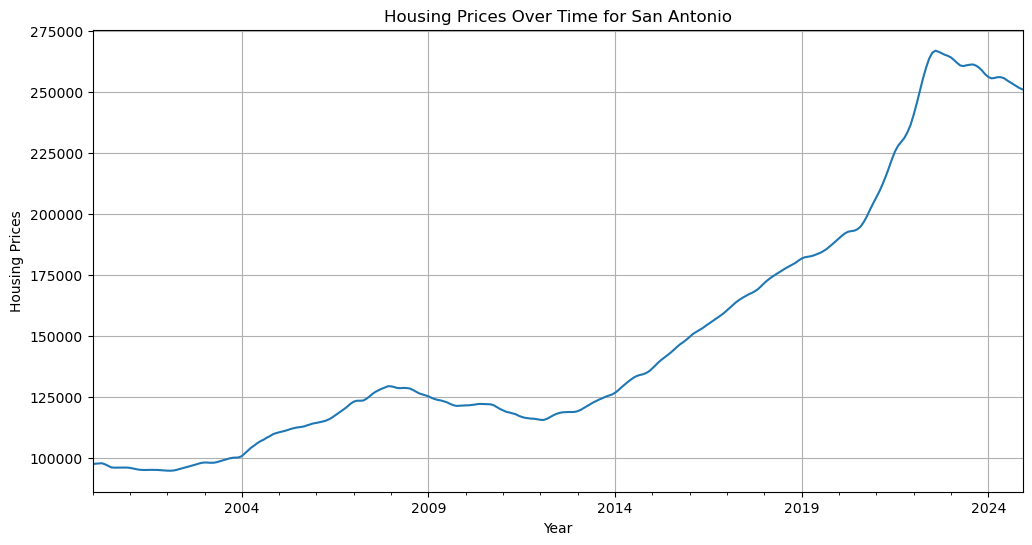

In [9]:
import matplotlib.pyplot as plt

# Extract time series data
time_series = city_data.iloc[0, 8:].T  # Skip first 8 columns (metadata)
time_series.index = pd.to_datetime(time_series.index, format="%Y-%m-%d")  # Convert to datetime
time_series.name = "Housing Prices"

# Plot
plt.figure(figsize=(12, 6))
time_series.plot()
plt.title("Housing Prices Over Time for San Antonio")
plt.xlabel("Year")
plt.ylabel("Housing Prices")
plt.grid()
plt.show()

In [11]:
average_price = time_series.mean()
print(f"Average Housing Price in San Antonio: ${average_price:,.2f}")

Average Housing Price in San Antonio: $148,991.37


/var/folders/rj/lwc3hbqn4cg27kn305h1_55m0000gn/T/ipykernel_31668/1748870500.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yearly_change = time_series.pct_change(periods=12) * 100  # Year-over-year percentage change


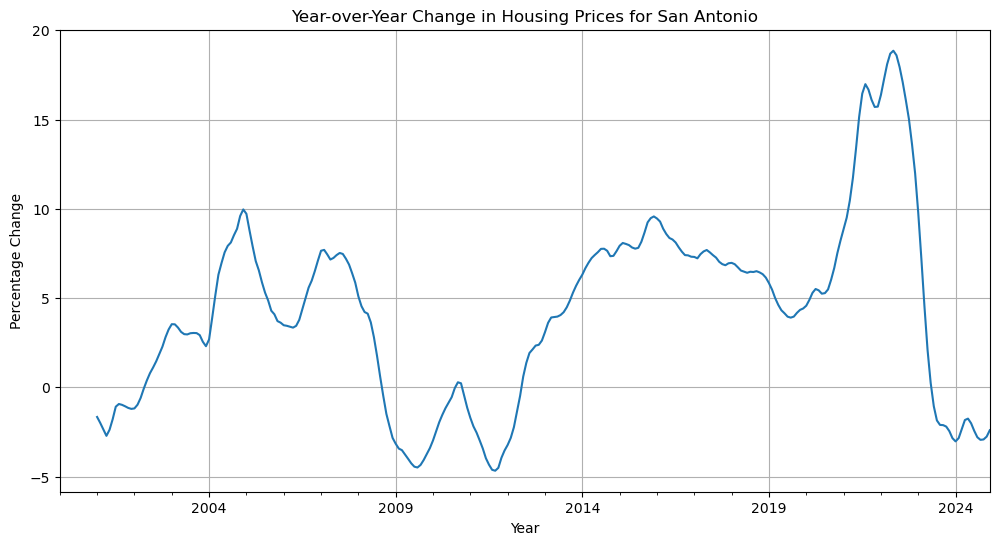

In [13]:
yearly_change = time_series.pct_change(periods=12) * 100  # Year-over-year percentage change
plt.figure(figsize=(12, 6))
yearly_change.plot()
plt.title("Year-over-Year Change in Housing Prices for San Antonio")
plt.xlabel("Year")
plt.ylabel("Percentage Change")
plt.grid()
plt.show()

Last actual date: 2024-12-31 00:00:00
First future prediction date: 2025-01-31 00:00:00
Future Predictions: [230316.79837579 230857.16669486 231397.53501393 231937.903333
 232478.27165207 233018.63997115 233559.00829022 234099.37660929
 234639.74492836 235180.11324744 235720.48156651 236260.84988558]


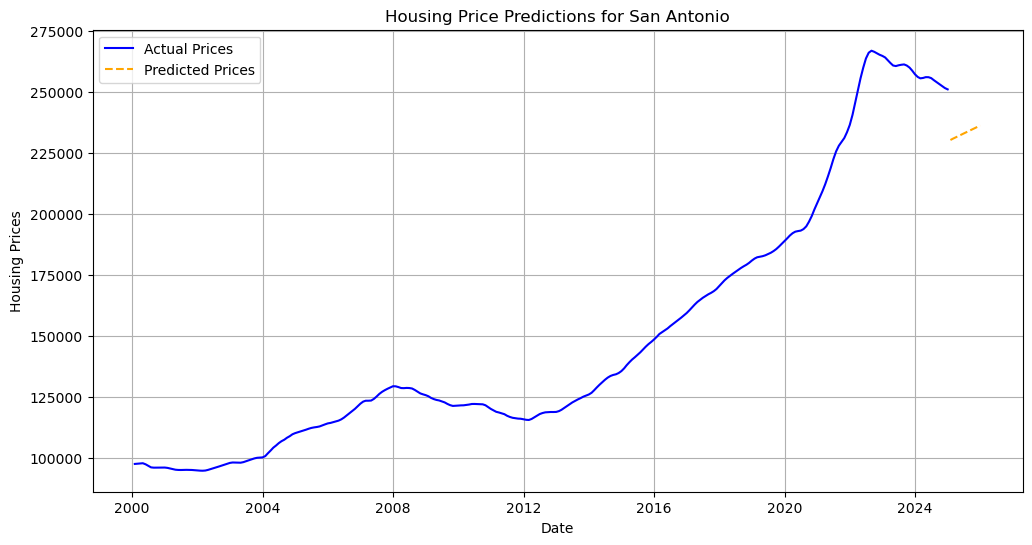

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Parse date columns
df.columns = [pd.to_datetime(col, errors='coerce') if '-' in str(col) else col for col in df.columns]

# Step 2: Filter for a specific city
city_name = "San Antonio"  # Change this to your city
city_data = df[df["RegionName"] == city_name]

# Step 3: Extract time series data
time_series = city_data.iloc[0, 8:].T  # Skip metadata columns
time_series.index = pd.to_datetime(time_series.index, format="%Y-%m-%d")  # Ensure proper datetime index
time_series.name = "Housing Prices"

# Step 4: Prepare data for regression
X = np.arange(len(time_series)).reshape(-1, 1)  # Numeric indices
y = time_series.values  # Housing price values

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 6: Predict future values
future_X = np.arange(len(time_series) + 12).reshape(-1, 1)  # Predict 12 months ahead
future_predictions = model.predict(future_X)

# Step 7: Create future dates for predictions
future_dates = pd.date_range(start=time_series.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq=pd.offsets.MonthEnd())

# Debugging step
print("Last actual date:", time_series.index[-1])
print("First future prediction date:", future_dates[0])
print("Future Predictions:", future_predictions[-12:])

# Step 8: Plot actual and predicted prices
plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(time_series.index, time_series.values, label="Actual Prices", color="blue")

# Plot predicted prices
plt.plot(future_dates, future_predictions[-12:], label="Predicted Prices", linestyle="--", color="orange")

# Add labels, title, and legend
plt.title(f"Housing Price Predictions for {city_name}")
plt.xlabel("Date")
plt.ylabel("Housing Prices")
plt.legend()
plt.grid()
plt.show()


In [29]:
plt.savefig("housing_predictions.png")

<Figure size 640x480 with 0 Axes>

Last actual date: 2024-12-31 00:00:00
First future prediction date: 2025-01-31 00:00:00
Future Predictions (Last 12 Months): [236801.21820465 237341.58652372 237881.9548428  238422.32316187
 238962.69148094 239503.05980001 240043.42811909 240583.79643816
 241124.16475723 241664.5330763  242204.90139537 242745.26971445]
Graph saved as 'enhanced_housing_predictions.png'.


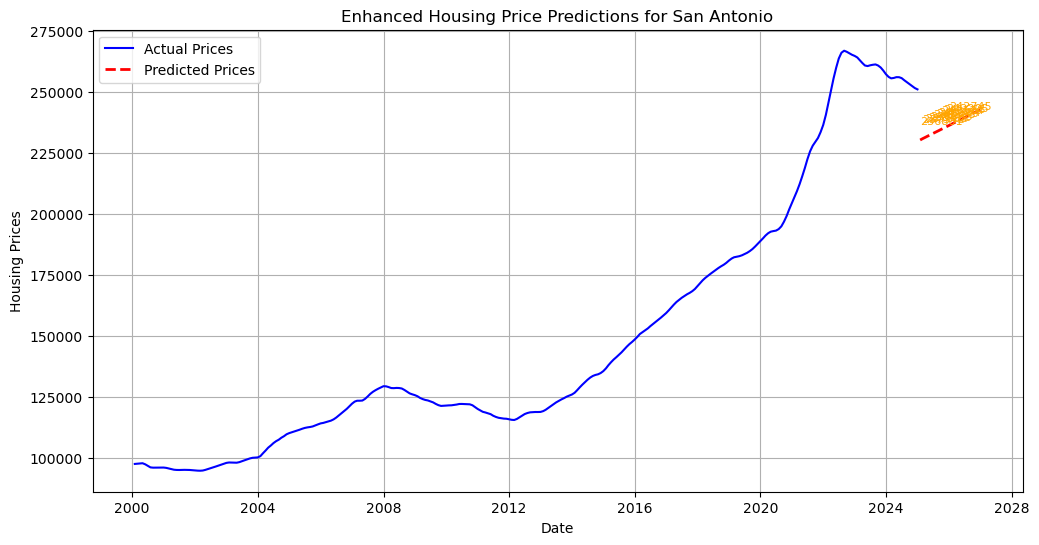

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Parse date columns
df.columns = [pd.to_datetime(col, errors='coerce') if '-' in str(col) else col for col in df.columns]

# Step 2: Filter for a specific city
city_name = "San Antonio"  # Change this to analyze another city
city_data = df[df["RegionName"] == city_name]

# Step 3: Extract time series data
time_series = city_data.iloc[0, 8:].T  # Skip metadata columns
time_series.index = pd.to_datetime(time_series.index, format="%Y-%m-%d")  # Ensure proper datetime index
time_series.name = "Housing Prices"

# Step 4: Prepare data for regression
X = np.arange(len(time_series)).reshape(-1, 1)  # Numeric indices
y = time_series.values  # Housing price values

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 6: Predict future values (extend to 24 months for more data)
future_X = np.arange(len(time_series) + 24).reshape(-1, 1)  # Predict 24 months ahead
future_predictions = model.predict(future_X)

# Step 7: Create future dates for predictions
future_dates = pd.date_range(start=time_series.index[-1] + pd.offsets.MonthEnd(1), periods=24, freq=pd.offsets.MonthEnd())

# Debugging (optional: ensure alignment of dates and predictions)
print("Last actual date:", time_series.index[-1])
print("First future prediction date:", future_dates[0])
print("Future Predictions (Last 12 Months):", future_predictions[-12:])

# Step 8: Plot actual and predicted prices
plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(time_series.index, time_series.values, label="Actual Prices", color="blue")

# Plot predicted prices
plt.plot(future_dates, future_predictions[-24:], label="Predicted Prices", linestyle="--", color="red", linewidth=2)

# Add data points as annotations for predicted prices
for i, value in enumerate(future_predictions[-12:]):  # Annotating last 12 predictions
    plt.text(future_dates[i], value, f"{value:.0f}", fontsize=8, color="orange")

# Add labels, title, legend, and grid
plt.title(f"Enhanced Housing Price Predictions for {city_name}")
plt.xlabel("Date")
plt.ylabel("Housing Prices")
plt.legend()
plt.grid()

# Save the plot
plt.savefig("enhanced_housing_predictions.png")
print("Graph saved as 'enhanced_housing_predictions.png'.")

# Show the plot
plt.show()
